In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import os,sys
try:
    import this_is_root
except:
    os.chdir(os.path.pardir) # change workdir to be root dir
    sys.path.insert(0, os.path.realpath("."))

In [2]:
def load_pickle(file_path):
    try:
        with open(file_path, 'rb') as file:
            loaded_data = pickle.load(file)
            #print("Pickle file loaded successfully.")
            # 'loaded_data' now contains the deserialized object from the pickle file
            # print("Loaded Data:", loaded_data.keys())
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None

    return loaded_data

In [3]:
def plot_pickle(file_path):
    loaded_data = load_pickle(file_path)

    NCOLS = 2
    fig,axes  = plt.subplots(ncols=NCOLS, nrows=1, figsize=(NCOLS*5,5))

    axes[0].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss'],label='train loss')
    axes[0].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss'],label='valid loss')
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Raw loss")

    axes[1].plot(range(len(loaded_data['train_loss'])), loaded_data['train_loss']/np.max(loaded_data['train_loss']),label='train loss')
    axes[1].plot(range(len(loaded_data['valid_loss'])), loaded_data['valid_loss']/np.max(loaded_data['valid_loss']),label='valid loss')
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Max noramzlized loss")

    axes[0].legend()
    plt.show()

In [4]:
file_path = 'run_statistics_spot_detection_lr-0.01_seed-324_num_channels-1__single.pickle'
loaded_data = load_pickle(file_path)

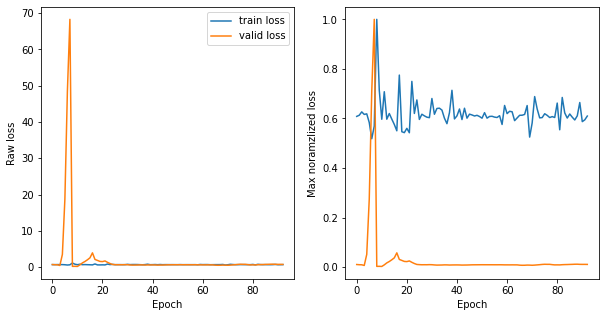

In [5]:
plot_pickle(file_path)

C:\Users\Lior\AppData\Local\Temp\ipykernel_8164\1833811657.py:6: RuntimeWarning: invalid value encountered in divide
  senstivity = tp/(tp+fn)
C:\Users\Lior\AppData\Local\Temp\ipykernel_8164\1833811657.py:7: RuntimeWarning: invalid value encountered in divide
  specificity = tn/(tn+fp)


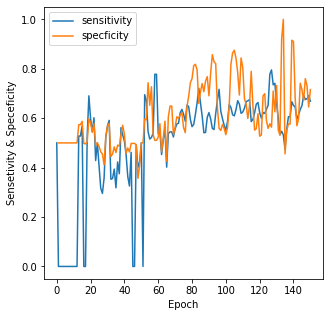

In [6]:
tp = np.array(loaded_data['valid_true_positive'])
fp = np.array(loaded_data['valid_false_positive'])
tn = np.array(loaded_data['valid_true_negative'])
fn = np.array(loaded_data['valid_false_negative'])

senstivity = tp/(tp+fn)
specificity = tn/(tn+fp)

# set zero values where the sensitivity is not defined
senstivity[np.isnan(senstivity)] = 0

fig,axes  = plt.subplots(ncols=1, nrows=1, figsize=(1*5,5))

axes.plot(range(len(senstivity)), senstivity,label='sensitivity')
axes.plot(range(len(specificity)), specificity,label='specficity')
axes.set_xlabel("Epoch")
axes.set_ylabel("Sensetivity & Speceficity")
axes.legend()

### Parameter sweep on learning rate and seed

File 'run_statistics_spot_detection_lr-0.01_seed-0_batchsize-20.pickle' not found.


TypeError: 'NoneType' object is not subscriptable

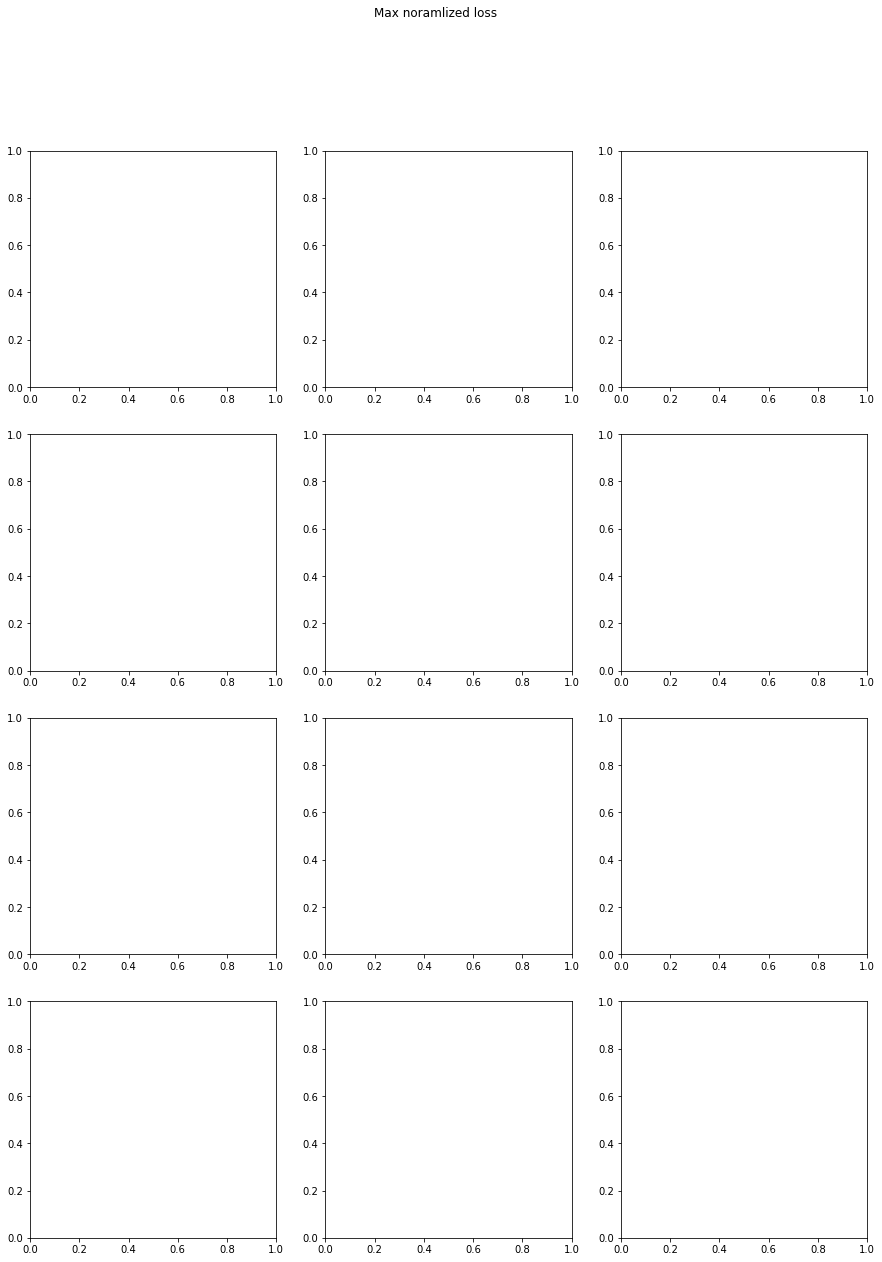

In [10]:
# learning rate change
MAX_NORMALIZE = True

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [20, 200, 500, 1000]
seeds = [0, 7]
NCOLS = len(learning_rates)
NROWS = len(batch_sizes)
fig, axes = plt.subplots(ncols=NCOLS, nrows=NROWS, figsize=(NCOLS*5,NROWS*5))

if MAX_NORMALIZE:
    plt.suptitle("Max noramlized loss")
    my_y_label = "Max normalized loss"
else:
    plt.suptitle("Raw loss")
    my_y_label = "Raw loss"

for ii,lr in enumerate(learning_rates): # cols\
    for kk,my_batch_size in enumerate(batch_sizes):
        for jj,my_seed in enumerate(seeds): # rows
            params_str = 'lr-'+str(lr)+'_seed-'+str(my_seed)+'_batchsize-'+str(my_batch_size)
            my_file = 'run_statistics_spot_detection_'+params_str+'.pickle'
            # print(my_file)
            p_data = load_pickle(my_file)
            # print(my_file)
            if MAX_NORMALIZE:
                axes[kk,ii].plot(range(len(p_data['train_loss'])), p_data['train_loss']/np.max(p_data['train_loss']),label="training(seed="+str(my_seed)+")")
                axes[kk,ii].plot(range(len(p_data['valid_loss'])), p_data['valid_loss']/np.max(p_data['valid_loss']),label="validation(seed="+str(my_seed)+")")
            else:
                axes[kk,ii].plot(range(len(p_data['train_loss'])), p_data['train_loss'],label="training(seed="+str(my_seed)+")")
                axes[kk,ii].plot(range(len(p_data['valid_loss'])), p_data['valid_loss'],label="validation(seed="+str(my_seed)+")")
            axes[kk,ii].set_xlabel("Epoch")
            axes[kk,ii].set_ylabel(my_y_label)
            axes[kk,ii].set_title("learning rate="+str(lr)+", batch size="+str(my_batch_size))
            # axes[ii].legend(["training(seed="+str(my_seed)+")","validation(seed="+str(my_seed)+")"])

        axes[kk,ii].legend()

### Parameter sweep on sensitivity and specificity

C:\Users\talbarka.WISMAIN\AppData\Local\Temp\ipykernel_13432\762518760.py:26: RuntimeWarning: invalid value encountered in divide
  sensitivity = tp/(tp+fn)


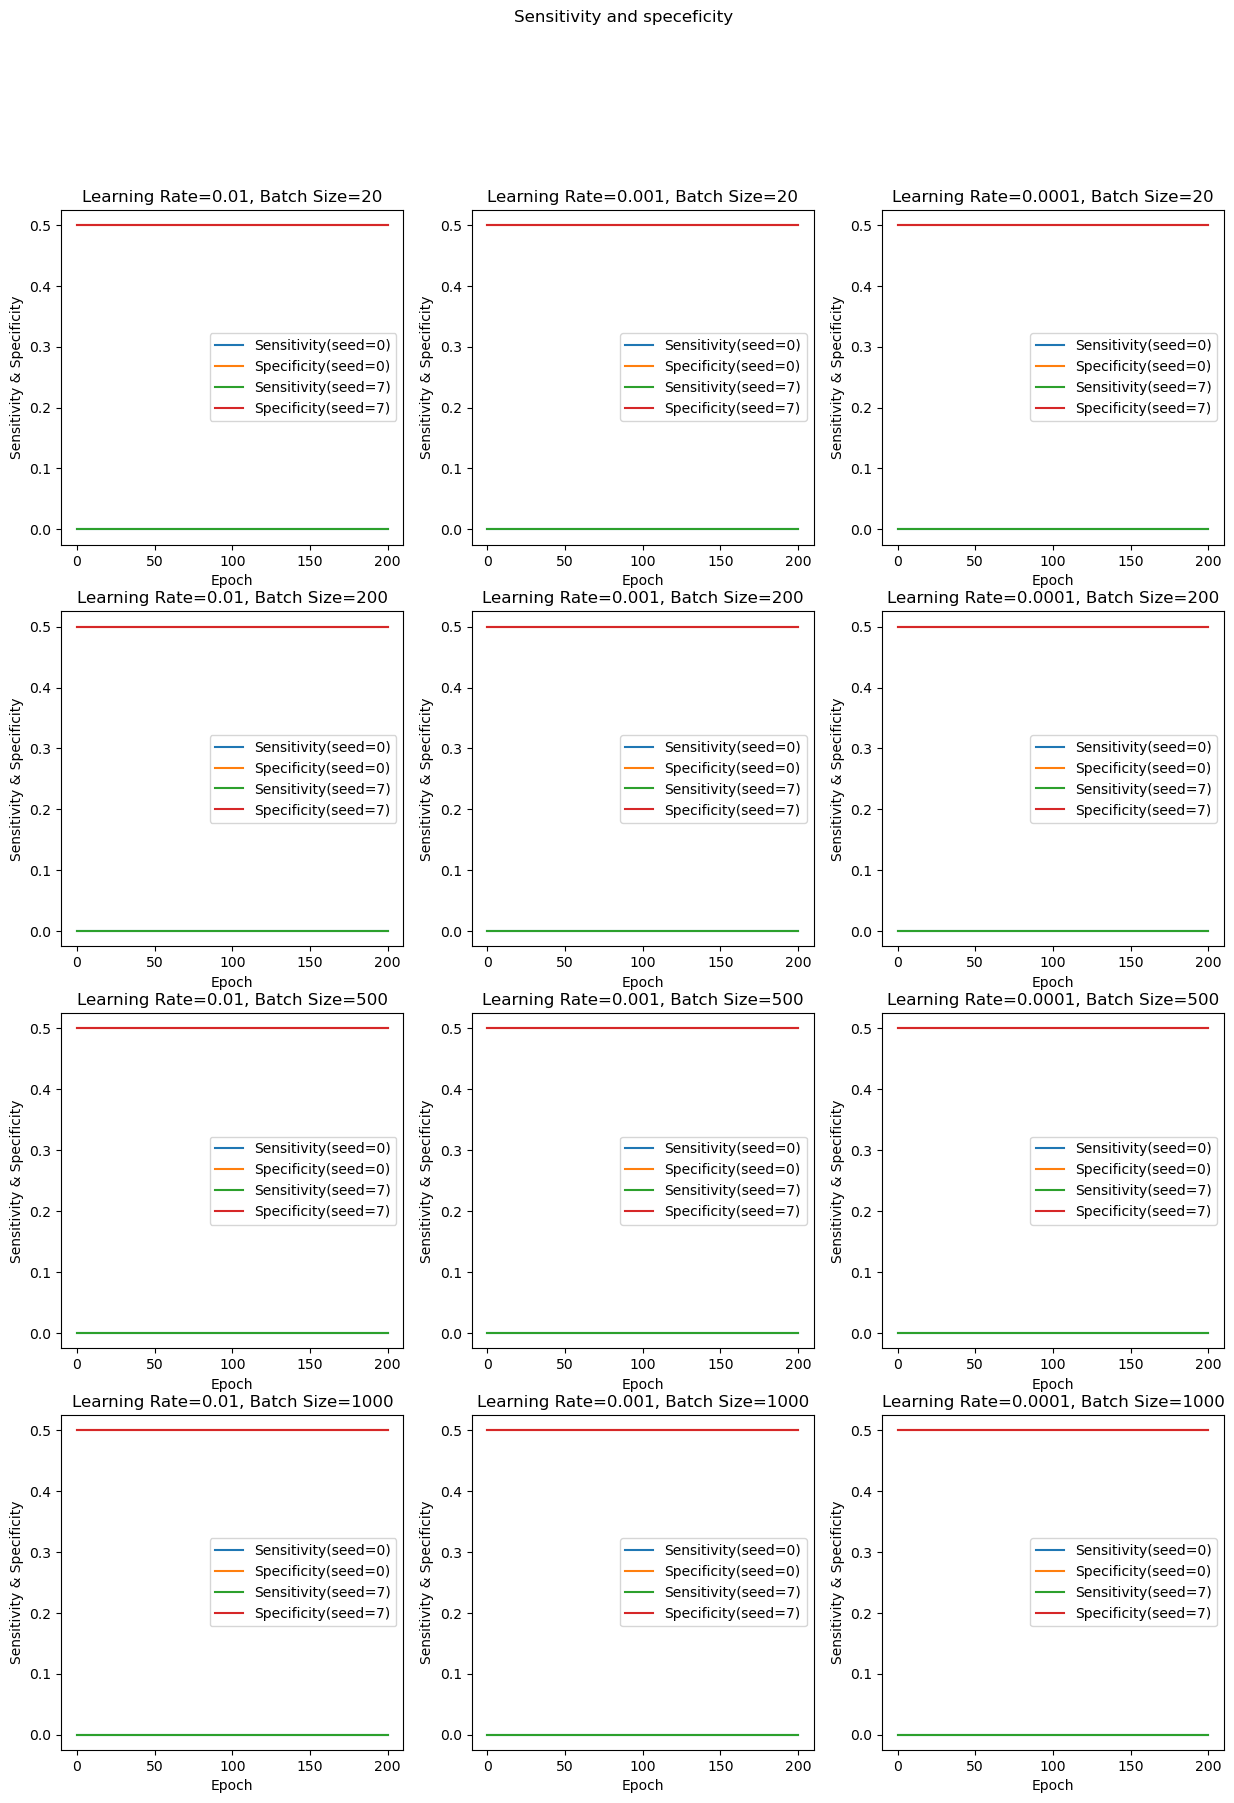

In [151]:
# sensetivity and specficiy figutres
# learning rate change
MAX_NORMALIZE = True

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [20, 200, 500, 1000]
seeds = [0, 7]
NCOLS = len(learning_rates)
NROWS = len(batch_sizes)
fig, axes = plt.subplots(ncols=NCOLS, nrows=NROWS, figsize=(NCOLS*5,NROWS*5))

plt.suptitle("Sensitivity and speceficity")

for ii,lr in enumerate(learning_rates): # cols
    for kk,my_batch_size in enumerate(batch_sizes):
        for jj,my_seed in enumerate(seeds): # rows
            params_str = 'lr-'+str(lr)+'_seed-'+str(my_seed)+'_batchsize-'+str(my_batch_size)
            my_file = 'run_statistics_spot_detection_'+params_str+'.pickle'
            p_data = load_pickle(my_file)

            tp = np.array(loaded_data['true_positive'])
            fp = np.array(loaded_data['false_positive'])
            tn = np.array(loaded_data['true_negative'])
            fn = np.array(loaded_data['false_negative'])

            sensitivity = tp/(tp+fn)
            specificity = tn/(tn+fp)

            # set zero values where the sensitivity is not defined
            sensitivity[np.isnan(sensitivity)] = 0

            axes[kk,ii].plot(range(len(sensitivity)), sensitivity,label="Sensitivity(seed="+str(my_seed)+")")
            axes[kk,ii].plot(range(len(specificity)), specificity,label="Specificity(seed="+str(my_seed)+")")
            axes[kk,ii].set_xlabel("Epoch")
            axes[kk,ii].set_ylabel("Sensitivity & Specificity")
            axes[kk,ii].set_title("Learning Rate="+str(lr)+", Batch Size="+str(my_batch_size))

        axes[kk,ii].legend()